In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import matplotlib.dates as mdates

## Pulling the data from online

In [2]:
data = pd.read_csv('https://github.com/nytimes/covid-19-data/raw/master/us-counties.csv')

In [3]:
data.sample(10)

,date,county,state,fips,cases,deaths
186548,2020-05-28,Geauga,Ohio,39055.0,272,31
126521,2020-05-08,Lee,South Carolina,45061.0,92,8
213045,2020-06-06,Dickinson,Iowa,19059.0,41,0
424119,2020-08-11,Johnson,Texas,48251.0,1980,30
269285,2020-06-24,Martin,Kentucky,21159.0,5,0
178634,2020-05-26,Lincoln,Arkansas,5079.0,975,8
40637,2020-04-08,Choctaw,Alabama,1023.0,6,0
425996,2020-08-12,Polk,Minnesota,27119.0,156,4
405877,2020-08-06,Madison,Idaho,16065.0,150,0
115661,2020-05-05,Brevard,Florida,12009.0,319,8


In [4]:
pops = pd.read_excel('https://www2.census.gov/programs-surveys/popest/tables/2010-2019/counties/totals/co-est2019-annres.xlsx', header=3)


In [5]:
pops.head()

,Unnamed: 0,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United States,308745538.0,308758105.0,309321666.0,311556874.0,313830990.0,315993715.0,318301008.0,320635163.0,322941311.0,324985539.0,326687501.0,328239523.0
1,".Autauga County, Alabama",54571.0,54597.0,54773.0,55227.0,54954.0,54727.0,54893.0,54864.0,55243.0,55390.0,55533.0,55869.0
2,".Baldwin County, Alabama",182265.0,182265.0,183112.0,186558.0,190145.0,194885.0,199183.0,202939.0,207601.0,212521.0,217855.0,223234.0
3,".Barbour County, Alabama",27457.0,27455.0,27327.0,27341.0,27169.0,26937.0,26755.0,26283.0,25806.0,25157.0,24872.0,24686.0
4,".Bibb County, Alabama",22915.0,22915.0,22870.0,22745.0,22667.0,22521.0,22553.0,22566.0,22586.0,22550.0,22367.0,22394.0


## Adding Rolling Averages for Each of the Counties

In [6]:
counties = ['Albemarle','Charlottesville city']
frame_list = []
county_data = pd.DataFrame(columns=['date','county','state','fips','cases', 'deaths'])
for i in range(len(counties)):
    county = counties[i]
    new_data = data[data.county == county]
    new_data['new_cases'] = new_data.cases.diff()
    new_data['rolling_avg'] = new_data.new_cases.rolling(window=7, min_periods=7).mean().round(2)
    frame_list.append(new_data)
full_data = pd.concat(frame_list)
full_data.fillna(0, inplace=True)
full_data.sample(10)

C:\Users\Jason\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Jason\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,county,state,fips,cases,deaths,new_cases,rolling_avg
408191,2020-08-06,Albemarle,Virginia,51003.0,798,16,7.0,9.29
89372,2020-04-25,Albemarle,Virginia,51003.0,73,3,1.0,2.43
440422,2020-08-16,Albemarle,Virginia,51003.0,906,16,16.0,9.71
267942,2020-06-23,Charlottesville city,Virginia,51540.0,176,3,4.0,2.29
331191,2020-07-13,Charlottesville city,Virginia,51540.0,285,7,9.0,6.86
169074,2020-05-22,Charlottesville city,Virginia,51540.0,74,2,2.0,0.43
414652,2020-08-08,Charlottesville city,Virginia,51540.0,537,15,17.0,9.43
100730,2020-04-29,Charlottesville city,Virginia,51540.0,52,2,1.0,1.14
92209,2020-04-26,Charlottesville city,Virginia,51540.0,49,2,1.0,1.14
61607,2020-04-15,Charlottesville city,Virginia,51540.0,38,1,2.0,2.14


## Population Clean-Up

In [7]:
pops = pops[['Unnamed: 0', 2019]]
pops.head()

,Unnamed: 0,2019
0,United States,328239523.0
1,".Autauga County, Alabama",55869.0
2,".Baldwin County, Alabama",223234.0
3,".Barbour County, Alabama",24686.0
4,".Bibb County, Alabama",22394.0


In [8]:
pops.drop(range(3143,3149), axis=0, inplace=True) #dropping the notes at the end 
pops.drop(0, axis=0, inplace=True) #dropping the US as a whole 
pops.rename({'Unnamed: 0': 'Original_County', 2019: 'Population'}, axis=1, inplace=True) #renaming the columns of the DF
pops.reset_index(drop=True, inplace=True) #resetting the index

In [9]:
pops.head()

,Original_County,Population
0,".Autauga County, Alabama",55869.0
1,".Baldwin County, Alabama",223234.0
2,".Barbour County, Alabama",24686.0
3,".Bibb County, Alabama",22394.0
4,".Blount County, Alabama",57826.0


In [10]:
pops.tail()

,Original_County,Population
3137,".Sweetwater County, Wyoming",42343.0
3138,".Teton County, Wyoming",23464.0
3139,".Uinta County, Wyoming",20226.0
3140,".Washakie County, Wyoming",7805.0
3141,".Weston County, Wyoming",6927.0


In [11]:
#Putting the county and state into separate columns
pops[['county','state']] = pops.Original_County.str.split(',', expand=True)
pops.county = pops.county.str.strip('.').str.replace('County','').str.strip() #stripping out the leading period and the word "County"
pops.state = pops.state.str.strip()
pops.sample(10)

,Original_County,Population,county,state
3113,".Washington County, Wisconsin",136034.0,Washington,Wisconsin
452,".Greene County, Georgia",18324.0,Greene,Georgia
2299,".Somerset County, Pennsylvania",73447.0,Somerset,Pennsylvania
2625,".Hartley County, Texas",5576.0,Hartley,Texas
1924,".Franklin County, North Carolina",69685.0,Franklin,North Carolina
1495,".Caldwell County, Missouri",9020.0,Caldwell,Missouri
769,".Shelby County, Indiana",44729.0,Shelby,Indiana
2434,".Campbell County, Tennessee",39842.0,Campbell,Tennessee
2129,".Wood County, Ohio",130817.0,Wood,Ohio
419,".Cobb County, Georgia",760141.0,Cobb,Georgia


In [12]:
final = pd.merge(full_data,pops, on=['county', 'state'], how='left')
final['cases_per_100k'] = final.rolling_avg / (final.Population / 100000)
final.date = pd.to_datetime(final.date)

## Past 10 Days of Raw Data

In [13]:
final[final.county=='Albemarle'].tail(10)

,date,county,state,fips,cases,deaths,new_cases,rolling_avg,Original_County,Population,cases_per_100k
140,2020-08-08,Albemarle,Virginia,51003.0,833,16,16.0,13.14,".Albemarle County, Virginia",109330.0,12.018659
141,2020-08-09,Albemarle,Virginia,51003.0,838,16,5.0,11.43,".Albemarle County, Virginia",109330.0,10.454587
142,2020-08-10,Albemarle,Virginia,51003.0,842,16,4.0,9.57,".Albemarle County, Virginia",109330.0,8.753316
143,2020-08-11,Albemarle,Virginia,51003.0,848,16,6.0,8.29,".Albemarle County, Virginia",109330.0,7.582548
144,2020-08-12,Albemarle,Virginia,51003.0,856,16,8.0,9.29,".Albemarle County, Virginia",109330.0,8.497210
145,2020-08-13,Albemarle,Virginia,51003.0,869,16,13.0,10.14,".Albemarle County, Virginia",109330.0,9.274673
146,2020-08-14,Albemarle,Virginia,51003.0,883,16,14.0,9.43,".Albemarle County, Virginia",109330.0,8.625263
147,2020-08-15,Albemarle,Virginia,51003.0,890,16,7.0,8.14,".Albemarle County, Virginia",109330.0,7.445349
148,2020-08-16,Albemarle,Virginia,51003.0,906,16,16.0,9.71,".Albemarle County, Virginia",109330.0,8.881368
149,2020-08-17,Albemarle,Virginia,51003.0,913,16,7.0,10.14,".Albemarle County, Virginia",109330.0,9.274673


In [14]:
final[final.county=='Charlottesville city'].tail(10)

,date,county,state,fips,cases,deaths,new_cases,rolling_avg,Original_County,Population,cases_per_100k
294,2020-08-08,Charlottesville city,Virginia,51540.0,537,15,17.0,9.43,".Charlottesville city, Virginia",47266.0,19.950916
295,2020-08-09,Charlottesville city,Virginia,51540.0,542,15,5.0,9.00,".Charlottesville city, Virginia",47266.0,19.041171
296,2020-08-10,Charlottesville city,Virginia,51540.0,543,15,1.0,6.86,".Charlottesville city, Virginia",47266.0,14.513604
297,2020-08-11,Charlottesville city,Virginia,51540.0,546,15,3.0,6.00,".Charlottesville city, Virginia",47266.0,12.694114
298,2020-08-12,Charlottesville city,Virginia,51540.0,550,15,4.0,6.57,".Charlottesville city, Virginia",47266.0,13.900055
299,2020-08-13,Charlottesville city,Virginia,51540.0,554,15,4.0,7.00,".Charlottesville city, Virginia",47266.0,14.809800
300,2020-08-14,Charlottesville city,Virginia,51540.0,555,15,1.0,5.00,".Charlottesville city, Virginia",47266.0,10.578428
301,2020-08-15,Charlottesville city,Virginia,51540.0,558,15,3.0,3.00,".Charlottesville city, Virginia",47266.0,6.347057
302,2020-08-16,Charlottesville city,Virginia,51540.0,560,15,2.0,2.57,".Charlottesville city, Virginia",47266.0,5.437312
303,2020-08-17,Charlottesville city,Virginia,51540.0,560,15,0.0,2.43,".Charlottesville city, Virginia",47266.0,5.141116


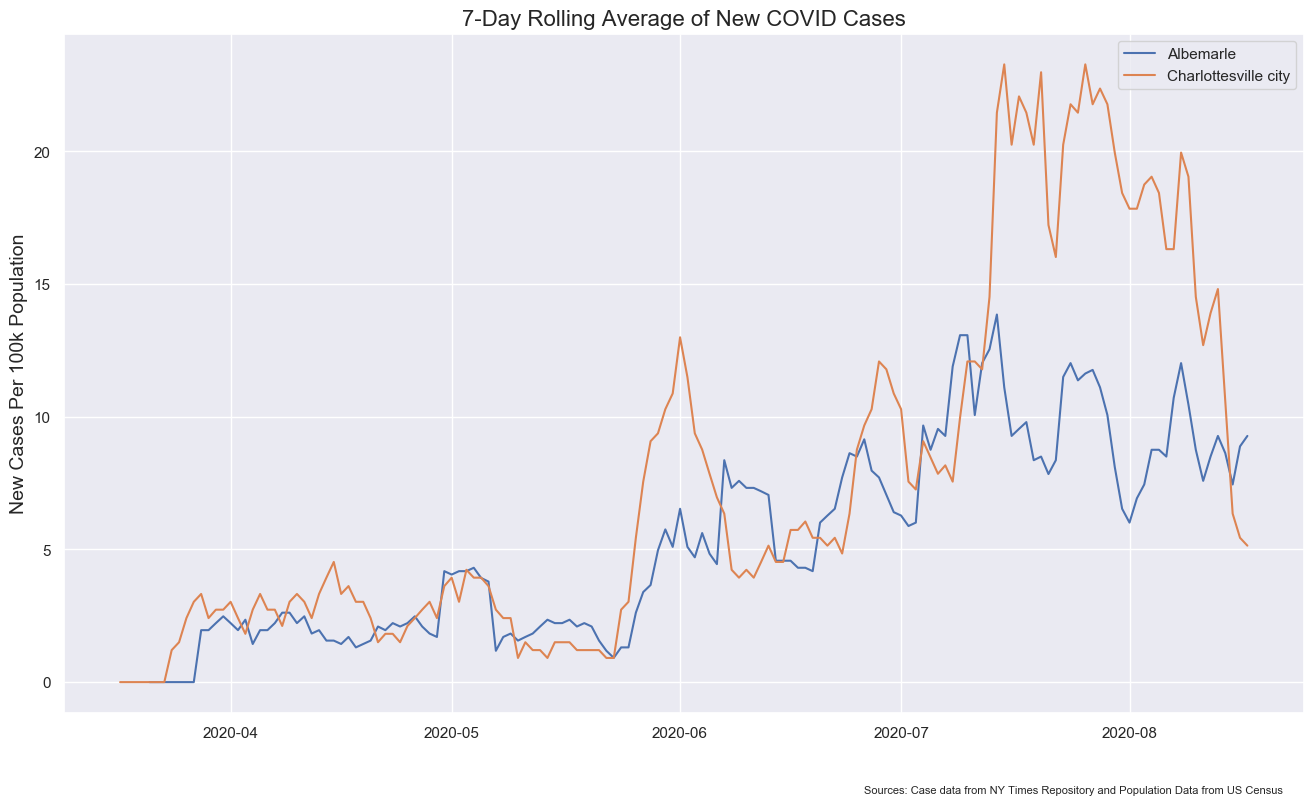

In [15]:
sns.set()
fig, axes = plt.subplots(1, 1,figsize=(16, 9), dpi=100)
plt.plot(final[final.county =='Albemarle'].date, final[final.county =='Albemarle'].cases_per_100k)
plt.plot(final[final.county =='Charlottesville city'].date, final[final.county =='Charlottesville city'].cases_per_100k)
plt.ylabel('New Cases Per 100k Population', fontsize=14)
months = mdates.MonthLocator()  # every month
axes.xaxis.set_major_locator(months)
plt.legend(counties)
plt.title("7-Day Rolling Average of New COVID Cases", fontsize=16)
plt.annotate("Sources: Case data from NY Times Repository and Population Data from US Census", xy=(800,-80), xycoords="axes pixels", fontsize=8)
plt.show()
fig.savefig('C:/Users/Jason/Documents/COVID/covidplot.png')